In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "svm"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

A **support vector machine (SVM)** is a powerful and versatile machine
learning model, capable of performing linear or nonlinear classification,
regression, and even novelty detection. SVMs shine with small to medium
sized nonlinear datasets (i.e., hundreds to thousands of instances), especially
for classification tasks. However, they don’t scale very well to very large
datasets, as you will see.

# Linear SVM Classification

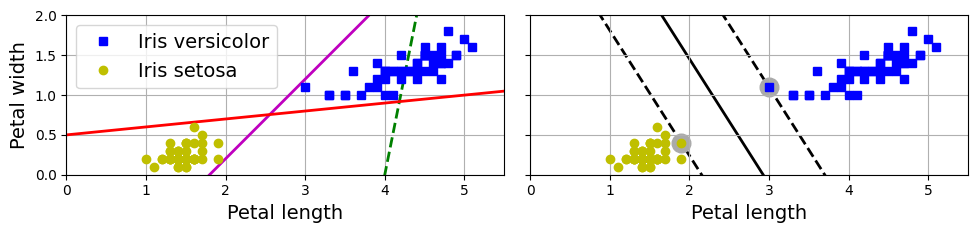

In [3]:
# extra code – this cell generates and saves Figure 5–1

import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=1e100)
svm_clf.fit(X, y)

# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA',
                zorder=-1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

save_fig("large_margin_classification_plot")
plt.show()

* SVMs (Support Vector Machines) are best understood using **geometric intuition and visual separation** of classes.
* In the given example (Iris dataset), the two classes are **linearly separable**, meaning a straight line can separate them.
* Multiple linear classifiers can separate the data, but **not all separating lines are equally good**.
* A **poor linear classifier** may fail to separate classes correctly at all.
* Some classifiers separate the training data perfectly but place the decision boundary **too close to training instances**.
* Decision boundaries that are too close to data points are **more sensitive to noise** and likely to **generalize poorly** to new data.
* An SVM chooses a decision boundary that:

  * Separates the classes correctly
  * Maximizes the **distance from the nearest training points**
* This distance is called the **margin**.
* SVM aims to find the **maximum-margin hyperplane**.
* The margin can be visualized as a **street** between the two classes.
* The decision boundary lies at the **center of this widest possible street**.
* The two parallel lines on either side of the decision boundary represent the **edges of the margin**.
* This approach is known as **large margin classification**.
* A larger margin generally leads to **better generalization performance**.
* Only the training instances that lie **on the edge of the margin** influence the decision boundary.
* These critical instances are called **support vectors**.
* Support vectors:

  * Are the closest points to the decision boundary
  * Fully determine the position and orientation of the boundary
* Adding new training instances **far away from the margin (“off the street”)**:

  * Does **not** change the decision boundary
  * Has **no effect** on the trained SVM model
* This property makes SVMs:

  * Robust to redundant data
  * Efficient in high-dimensional spaces
* Conceptually, SVM learning focuses on **boundary-defining points**, not the entire dataset.


>SVMs are sensitive to the feature scales, as you can see in Figure below. In the left plot, the
vertical scale is much larger than the horizontal scale, so the widest possible street is close
to horizontal. After feature scaling (e.g., using Scikit-Learn’s StandardScaler), the decision
boundary in the right plot looks much better

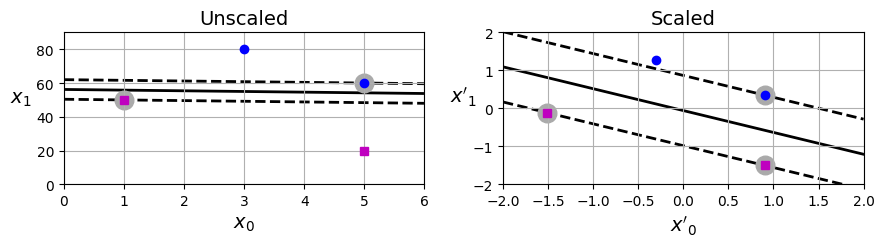

In [4]:
# extra code – this cell generates and saves Figure 5–2

from sklearn.preprocessing import StandardScaler

Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100).fit(Xs, ys)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf_scaled = SVC(kernel="linear", C=100).fit(X_scaled, ys)

plt.figure(figsize=(9, 2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$")
plt.ylabel("$x_1$    ", rotation=0)
plt.title("Unscaled")
plt.axis([0, 6, 0, 90])
plt.grid()

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf_scaled, -2, 2)
plt.xlabel("$x'_0$")
plt.ylabel("$x'_1$  ", rotation=0)
plt.title("Scaled")
plt.axis([-2, 2, -2, 2])
plt.grid()

save_fig("sensitivity_to_feature_scales_plot")
plt.show()

## Soft Margin Classification

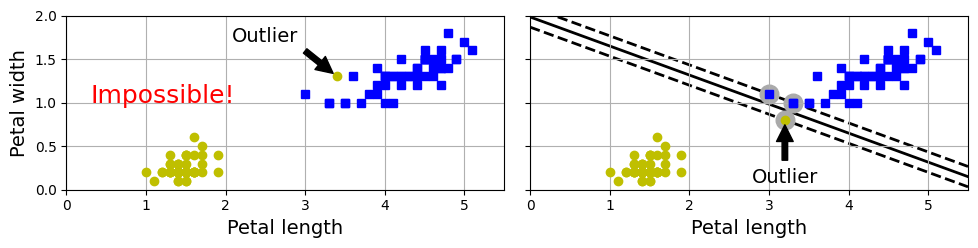

In [5]:
# extra code – this cell generates and saves Figure 5–3

X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", color="red", fontsize=18)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.annotate(
    "Outlier",
    xy=(X_outliers[0][0], X_outliers[0][1]),
    xytext=(2.5, 1.7),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
)
plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length")
plt.annotate(
    "Outlier",
    xy=(X_outliers[1][0], X_outliers[1][1]),
    xytext=(3.2, 0.08),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
)
plt.axis([0, 5.5, 0, 2])
plt.grid()

save_fig("sensitivity_to_outliers_plot")
plt.show()

* **Hard margin classification**:

  * Strictly enforces that **all training instances**:

    * Lie **outside the margin (“off the street”)**
    * Are on the **correct side** of the decision boundary
  * **No margin violations are allowed**

* **Limitations of hard margin classification**:

  * Works **only if the data is perfectly linearly separable**
  * **Fails completely** when classes overlap
  * **Highly sensitive to outliers**

    * A single outlier can:

      * Make it **impossible** to find a separating hyperplane
      * Or drastically change the decision boundary

* Effect of outliers:

  * Even one outlier can:

    * Force the margin to shrink excessively
    * Rotate or shift the decision boundary significantly
  * This leads to **poor generalization** on unseen data

* Motivation for a more flexible approach:

  * Real-world datasets are:

    * Rarely perfectly separable
    * Often noisy
    * Commonly contain outliers

* **Soft margin classification**:

  * Relaxes the strict constraints of hard margin classification
  * Allows some instances to:

    * Lie **inside the margin**
    * Or even be **misclassified**

* Goal of soft margin classification:

  * **Maximize the margin width**
  * While **penalizing margin violations**

* Margin violations include:

  * Instances inside the margin
  * Instances on the wrong side of the decision boundary

* Soft margin classification introduces a **trade-off**:

  * Large margin → better generalization
  * Fewer violations → better training accuracy

* The objective is to find the **best balance** between:

  * Keeping the street as wide as possible
  * Limiting the number and severity of violations

* Soft margin classification makes SVMs:

  * Robust to outliers
  * Applicable to non-perfectly separable data
  * More reliable for real-world problems


---
* In Scikit-Learn SVMs, **C** is the **regularization hyperparameter**.
* The value of **C** controls the **trade-off between margin size and margin violations**.
* **Low value of C**:

  * Allows a **wider margin (larger street)**
  * Permits **more margin violations**

    * More points inside the margin
    * More misclassified points
  * Results in **more support vectors**
  * Model focuses less on fitting every training point
  * **Lower risk of overfitting**
  * If C is too small → **underfitting**
* **High value of C**:

  * Enforces **strict margin constraints**
  * Margin becomes **narrower**
  * **Fewer margin violations allowed**
  * Model tries harder to classify all training instances correctly
  * **Fewer support vectors**
  * Higher risk of **overfitting**, especially with noisy data
* Intuition:

  * **C ≈ penalty strength**
  * High C → large penalty for violations
  * Low C → small penalty for violations
* Effect on generalization:

  * Moderate C often gives the **best generalization**
  * Extremely low C → model too simple
  * Extremely high C → model too sensitive to training data
* Example from the figure:

  * Model with **C = 1**:

    * Margin too wide
    * Too many violations
    * Appears to **underfit**
  * Model with **C = 100**:

    * Better balance between margin width and violations
    * Likely to **generalize better**
* Practical takeaway:

  * **C must be tuned** (e.g., via cross-validation)
  * Default values may not be optimal for all datasets


>If your SVM model is overfitting, you can try regularizing it by reducing C

In [6]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)  # Iris virginica

svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1, dual=True, random_state=42))
svm_clf.fit(X, y)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('standardscaler', ...), ('linearsvc', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"penalty penalty: {'l1', 'l2'}, default='l2'Specifies the norm used in the penalization. The 'l2'penalty is the standard used in SVC. The 'l1' leads to ``coef_``vectors that are sparse.",'l2'
,"loss loss: {'hinge', 'squared_hinge'}, default='squared_hinge'Specifies the loss function. 'hinge' is the standard SVM loss(used e.g. by the SVC class) while 'squared_hinge' is thesquare of the hinge loss. The combination of ``penalty='l1'``and ``loss='hinge'`` is not supported.",'squared_hinge'
,"dual dual: ""auto"" or bool, default=""auto""Select the algorithm to either solve the dual or primaloptimization problem. Prefer dual=False when n_samples > n_features.`dual=""auto""` will choose the value of the parameter automatically,based on the values of `n_samples`, `n_features`, `loss`, `multi_class`and `penalty`. If `n_samples` < `n_features` and optimizer supportschosen `loss`, `multi_class` and `penalty`, then dual will be set to True,otherwise it will be set to False... versionchanged:: 1.3 The `""auto""` option is added in version 1.3 and will be the default in version 1.5.",True
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001


In [7]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [8]:
 svm_clf.decision_function(X_new)

array([ 0.66163411, -0.22036063])

* **LinearSVC** does **not** provide a `predict_proba()` method.

* This means **LinearSVC cannot directly estimate class probabilities**.

* Reason:

  * LinearSVC is optimized for **speed and scalability**
  * It focuses on the **decision function**, not probability estimation

* If probability estimates are required:

  * Use **SVC** instead of LinearSVC
  * Set the hyperparameter:

    * `probability = True`

* When `probability = True` in SVC:

  * The model performs **additional processing after training**
  * Decision function scores are converted into **probability estimates**

* How probability estimation works internally:

  * Uses **5-fold cross-validation**
  * Generates **out-of-sample predictions** for every training instance
  * These predictions are used to train a **LogisticRegression model**
  * This LogisticRegression maps SVM scores → probability values

* Consequences of enabling probability estimates:

  * **Training becomes significantly slower**
  * Extra computational cost due to:

    * Cross-validation
    * Training an additional model

* After training with `probability = True`:

  * The following methods become available:

    * `predict_proba()`
    * `predict_log_proba()`

* Practical trade-off:

  * **LinearSVC**:

    * Faster
    * No probabilities
  * **SVC with probability=True**:

    * Slower
    * Provides calibrated probability estimates

* Recommendation:

  * Enable probabilities **only if needed**
  * Otherwise, prefer LinearSVC for efficiency


C:\Users\roush\AppData\Local\Temp\ipykernel_21364\1500710550.py:25: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
C:\Users\roush\AppData\Local\Temp\ipykernel_21364\1500710550.py:26: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()


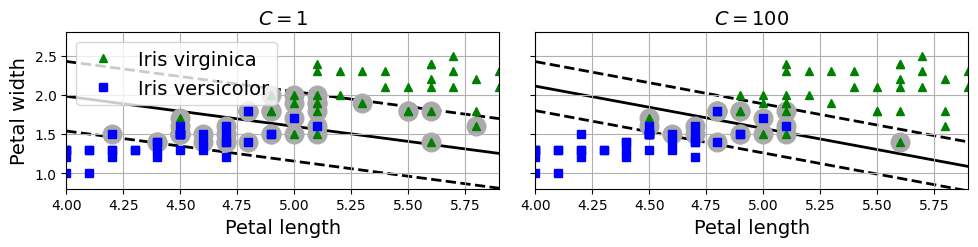

In [9]:
# extra code – this cell generates and saves Figure 5–4

scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, max_iter=10_000, dual=True, random_state=42)
svm_clf2 = LinearSVC(C=100, max_iter=10_000, dual=True, random_state=42)

scaled_svm_clf1 = make_pipeline(scaler, svm_clf1)
scaled_svm_clf2 = make_pipeline(scaler, svm_clf2)

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.title(f"$C = {svm_clf1.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length")
plt.title(f"$C = {svm_clf2.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

save_fig("regularization_plot")
plt.show()

# Nonlinear SVM Classification

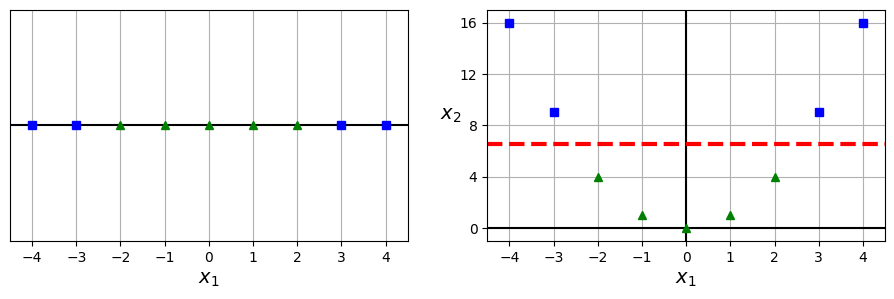

In [10]:
# extra code – this cell generates and saves Figure 5–5

X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel("$x_1$")
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$  ", rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

save_fig("higher_dimensions_plot", tight_layout=False)
plt.show()

* **Linear SVM classifiers**:

  * Are computationally efficient
  * Often perform well in practice
  * But **fail on many real-world datasets** that are not linearly separable

* **Nonlinear datasets**:

  * Cannot be separated using a straight line (or hyperplane)
  * Require more expressive decision boundaries

* One approach to handle nonlinearity:

  * **Add more features** to the dataset
  * Transform the original feature space into a **higher-dimensional space**

* **Polynomial features**:

  * A common feature expansion technique
  * Example:

    * Original dataset has one feature:
      ( x )
    * Dataset is **not linearly separable**
    * Add a new feature:
      ( x_2 = x^2 )
    * The transformed 2D dataset becomes **linearly separable**

* Key idea:

  * A **nonlinear problem in low dimensions**
  * Can become a **linear problem in higher dimensions**

* This technique allows:

  * Using a **linear classifier**
  * While modeling **nonlinear decision boundaries**

* Implementation in Scikit-Learn:

  * Use a **Pipeline** to chain transformations and the classifier
  * Typical pipeline components:

    * `PolynomialFeatures` → generates polynomial feature combinations
    * `StandardScaler` → scales features (important for SVMs)
    * `LinearSVC` → linear SVM classifier

* Why scaling is important:

  * Polynomial features can have **very different scales**
  * Feature scaling improves:

    * Optimization convergence
    * Model stability
    * Performance

* Example dataset: **moons dataset**

  * A toy dataset for **binary classification**
  * Data points form **two interleaving crescent shapes**
  * Not linearly separable in original feature space

* Dataset generation:

  * Use `make_moons()` from Scikit-Learn
  * Commonly used to:

    * Test nonlinear classifiers
    * Visualize decision boundaries

* Practical insight:

  * Polynomial feature expansion + linear SVM
  * Can approximate nonlinear boundaries
  * But may become:

    * Computationally expensive
    * Prone to overfitting for high-degree polynomials


In [11]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, dual=True, random_state=42)
)
polynomial_svm_clf.fit(X, y)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('polynomialfeatures', ...), ('standardscaler', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"degree degree: int or tuple (min_degree, max_degree), default=2If a single int is given, it specifies the maximal degree of thepolynomial features. If a tuple `(min_degree, max_degree)` is passed,then `min_degree` is the minimum and `max_degree` is the maximumpolynomial degree of the generated features. Note that `min_degree=0`and `min_degree=1` are equivalent as outputting the degree zero term isdetermined by `include_bias`.",3
,"interaction_only interaction_only: bool, default=FalseIf `True`, only interaction features are produced: features that areproducts of at most `degree` *distinct* input features, i.e. terms withpower of 2 or higher of the same input feature are excluded:- included: `x[0]`, `x[1]`, `x[0] * x[1]`, etc.- excluded: `x[0] ** 2`, `x[0] ** 2 * x[1]`, etc.",False
,"include_bias include_bias: bool, default=TrueIf `True` (default), then include a bias column, the feature in whichall polynomial powers are zero (i.e. a column of ones - acts as anintercept term in a linear model).",True
,"order order: {'C', 'F'}, default='C'Order of output array in the dense case. `'F'` order is faster tocompute, but may slow down subsequent estimators... versionadded:: 0.21",'C'
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


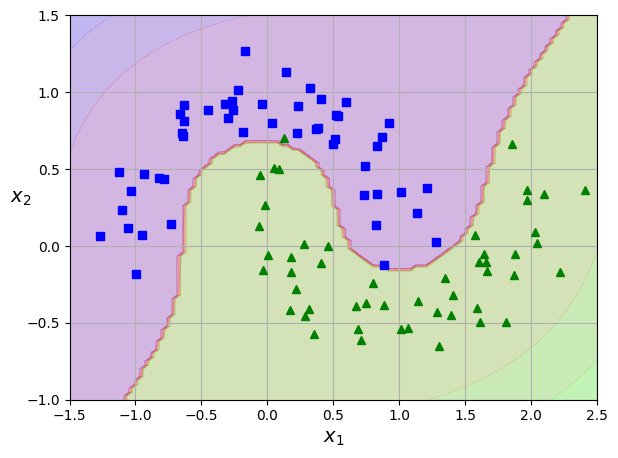

In [12]:
# extra code – this cell generates and saves Figure 5–6

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

save_fig("moons_polynomial_svc_plot")
plt.show()

## Polynomial Kernel

In [13]:
from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(StandardScaler(),
                                    SVC(kernel="poly", degree=3, coef0=1, C=5))
poly_kernel_svm_clf.fit(X, y)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('standardscaler', ...), ('svc', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",5
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'poly'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'


* **Polynomial feature expansion**:

  * Easy to implement
  * Works with many ML algorithms, not just SVMs

* Limitations of polynomial features:

  * **Low degree**:

    * Cannot capture very complex decision boundaries
    * Leads to **underfitting**
  * **High degree**:

    * Produces a **huge number of features**
    * Causes:

      * High computational cost
      * Slow training
      * Risk of overfitting
    * Known as **combinatorial explosion** of features

* SVM-specific solution: **kernel trick**

  * A powerful mathematical technique
  * Allows SVMs to behave **as if** high-degree polynomial features were added
  * Does **not actually compute** or store those features explicitly
  * Avoids feature-space explosion

* Key idea of the kernel trick:

  * Compute **similarities** between data points
  * Operate implicitly in a **high-dimensional feature space**
  * Keep computations efficient

* Kernel trick is implemented in Scikit-Learn via the **SVC** class

* Using a **polynomial kernel**:

  * Enables nonlinear decision boundaries
  * Without manual feature engineering

* Example pipeline components:

  * `StandardScaler`:

    * Scales features (important for SVM performance)
  * `SVC(kernel="poly", degree=3, coef0=1, C=5)`:

    * Uses a polynomial kernel of degree 3

* Polynomial kernel hyperparameters:

  * **degree**:

    * Controls the complexity of the decision boundary
    * Higher degree → more complex boundary
  * **C**:

    * Regularization strength
    * Controls margin vs misclassification trade-off
  * **coef0**:

    * Controls the influence of:

      * High-degree terms
      * Versus low-degree terms
    * Larger `coef0` → more weight to high-degree terms

* Model behavior:

  * **Low polynomial degree**:

    * Simpler decision boundary
    * Risk of underfitting
  * **High polynomial degree**:

    * Very flexible boundary
    * Risk of overfitting

* Practical tuning strategy:

  * Overfitting → reduce `degree` or `C`
  * Underfitting → increase `degree` or `C`
  * Adjust `coef0` to balance feature influence

* Visualization insight:

  * Degree 3 kernel → smoother boundary
  * Degree 10 kernel → highly complex boundary

* Key takeaway:

  * Kernel trick provides **nonlinear power** to SVMs
  * Without the computational cost of explicit feature expansion


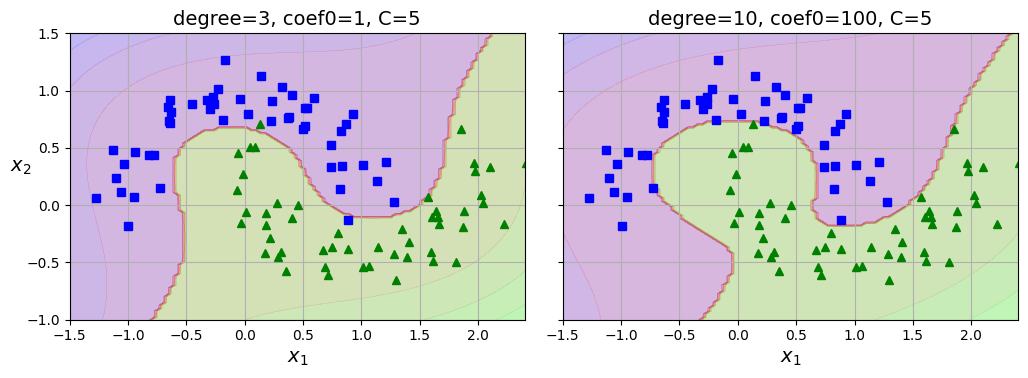

In [14]:
# extra code – this cell generates and saves Figure 5–7

poly100_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=10, coef0=100, C=5)
)
poly100_kernel_svm_clf.fit(X, y)

fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=3, coef0=1, C=5")

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=10, coef0=100, C=5")
plt.ylabel("")

save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

> Although hyperparameters will generally be tuned automatically (e.g., using randomized
search), it’s good to have a sense of what each hyperparameter actually does and how it
may interact with other hyperparameters: this way, you can narrow the search to a much
smaller space

## Similarity Features

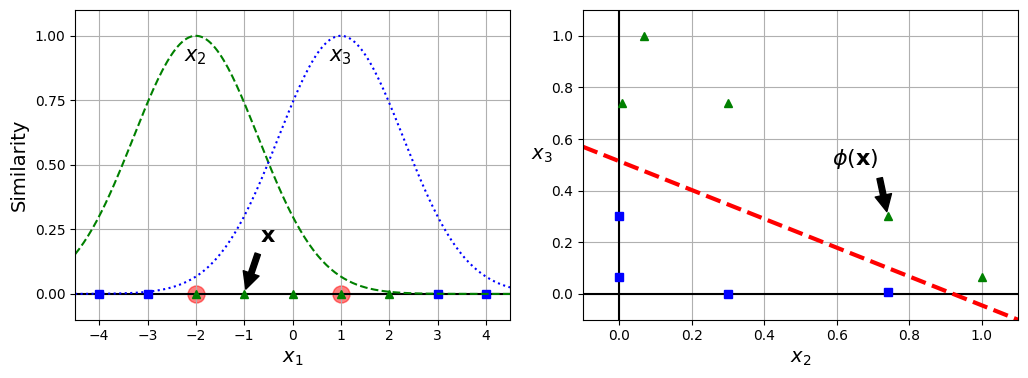

In [15]:
# extra code – this cell generates and saves Figure 5–8

def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel("$x_1$")
plt.ylabel("Similarity")
plt.annotate(
    r'$\mathbf{x}$',
    xy=(X1D[3, 0], 0),
    xytext=(-0.5, 0.20),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
    fontsize=16,
)
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=15)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=15)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel("$x_2$")
plt.ylabel("$x_3$  ", rotation=0)
plt.annotate(
    r'$\phi\left(\mathbf{x}\right)$',
    xy=(XK[3, 0], XK[3, 1]),
    xytext=(0.65, 0.50),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
    fontsize=16,
)
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

save_fig("kernel_method_plot")
plt.show()

* Another approach to handle **nonlinear datasets** is to create **similarity-based features**.

* Instead of directly using the original features, each instance is described by **how similar it is to selected landmarks**.

* This idea was previously used with **geographic similarity features**.

* **Landmarks**:

  * Fixed reference points in feature space
  * Each landmark generates **one new feature**
  * The value of that feature represents similarity to the landmark

* Example setup:

  * Original dataset: **1D feature ( x )**
  * Two landmarks placed at:

    * ( x = -2 )
    * ( x = 1 )

* **Similarity function**:

  * Gaussian Radial Basis Function (RBF)
  * Bell-shaped curve centered at the landmark
  * Values range:

    * Close to **1** → very similar (near landmark)
    * Close to **0** → very dissimilar (far from landmark)

* Gaussian RBF formula:

  * ( \text{similarity}(x, \ell) = \exp(-\gamma |x - \ell|^2) )
  * Where:

    * ( x ) = input instance
    * ( \ell ) = landmark
    * ( \gamma ) = controls width of the bell curve

* Role of ( \gamma ):

  * Small ( \gamma ) → wide bell → smoother similarity
  * Large ( \gamma ) → narrow bell → more localized influence

* Example computation:

  * Instance: ( x = -1 )
  * Distance to landmark ( -2 ):

    * ( | -1 - (-2) | = 1 )
  * Distance to landmark ( 1 ):

    * ( | -1 - 1 | = 2 )

* New features for ( x = -1 ):

  * ( x_1 = \exp(-0.3 \times 1^2) \approx 0.74 )
  * ( x_2 = \exp(-0.3 \times 2^2) \approx 0.30 )

* Resulting transformation:

  * Original 1D data → transformed into **2D feature space**
  * Original feature can be **dropped**
  * Transformed dataset becomes **linearly separable**

* Key intuition:

  * Nonlinear structure in original space
  * Becomes linear after similarity-based transformation

* Landmark selection strategy:

  * Simplest approach:

    * Place **one landmark per training instance**
  * Advantages:

    * Very expressive feature space
    * High chance of linear separability
  * Disadvantages:

    * If dataset has ( m ) instances:

      * Transformed dataset has ( m ) features
    * Leads to:

      * High memory usage
      * Slow computation for large datasets

* Practical limitation:

  * Similarity-based feature expansion does **not scale well** for large datasets
  * Motivates the need for **kernel-based methods** (like RBF kernel SVMs)

* Core takeaway:

  * Similarity features can linearize nonlinear problems
  * Gaussian RBF is a powerful similarity function
  * Explicit feature expansion becomes expensive at scale


## Gaussian RBF Kernel

* **Similarity-based features**, like polynomial features:

  * Can be used with **any machine learning algorithm**
  * Are often **computationally expensive**, especially for large datasets

* Explicit similarity feature expansion issues:

  * Requires computing similarity to many landmarks
  * Leads to:

    * Large number of features
    * High memory usage
    * Slow training

* **Kernel trick (again)**:

  * Allows SVMs to behave **as if many similarity features were added**
  * Avoids explicitly computing those features
  * Keeps computation efficient

* **Gaussian RBF kernel**:

  * One of the **most popular SVM kernels**
  * Implemented using:

    * `SVC(kernel="rbf")`
  * Implicitly uses **Gaussian similarity features**

* Example model configuration:

  * `StandardScaler`:

    * Scales features (critical for RBF kernel)
  * `SVC(kernel="rbf", gamma=5, C=0.001)`:

    * `gamma` (γ) → controls similarity influence range
    * `C` → regularization strength

* Interpretation of **gamma (γ)**:

  * Controls the **width of the Gaussian bell curve**
  * Large γ:

    * Narrow bell
    * Each instance influences only nearby points
    * Decision boundary becomes:

      * Highly flexible
      * Irregular / wiggly
    * Higher risk of **overfitting**
  * Small γ:

    * Wide bell
    * Each instance influences a larger region
    * Decision boundary becomes:

      * Smooth
      * Less complex
    * Higher risk of **underfitting**

* Gamma as a regularization parameter:

  * Behaves similarly to **C**
  * Controls model complexity
  * Tuning rule:

    * Overfitting → decrease γ
    * Underfitting → increase γ

* Combined effect of **C and γ**:

  * Large C + large γ:

    * Very complex boundary
    * High overfitting risk
  * Small C + small γ:

    * Very smooth boundary
    * Underfitting risk
  * Proper tuning required for good generalization

* Visualization insight (Figure 5-9):

  * Different (C, γ) combinations produce:

    * Very different decision boundaries
    * From smooth to highly irregular

* Other SVM kernels:

  * Exist but are **used less frequently**
  * Often designed for **specific data structures**

* Examples of specialized kernels:

  * **String kernels**:

    * Used for:

      * Text classification
      * DNA sequence analysis
  * Examples include:

    * String subsequence kernel
    * Kernels based on **Levenshtein distance**

* Core takeaway:

  * RBF kernel SVM is a powerful default choice
  * Kernel trick enables nonlinear modeling efficiently
  * Proper tuning of **C and γ** is critical for performance


In [16]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
                                   SVC(kernel="rbf", gamma=5, C=0.001))
rbf_kernel_svm_clf.fit(X, y)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('standardscaler', ...), ('svc', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",0.001
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",5


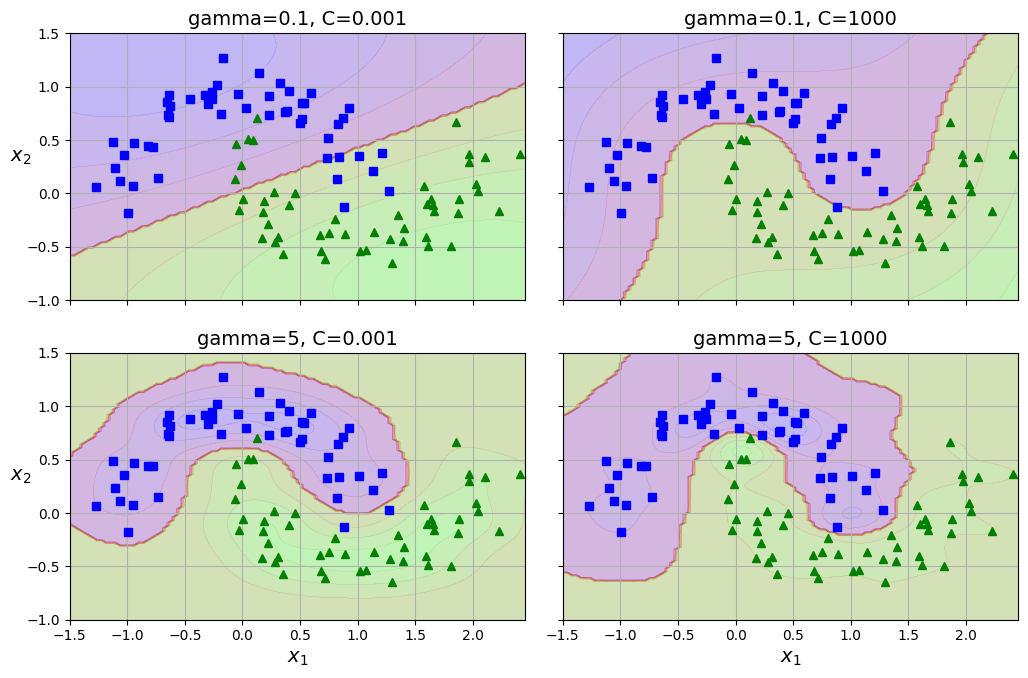

In [17]:
# extra code – this cell generates and saves Figure 5–9

from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = make_pipeline(
        StandardScaler(),
        SVC(kernel="rbf", gamma=gamma, C=C)
    )
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(f"gamma={gamma}, C={C}")
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

save_fig("moons_rbf_svc_plot")
plt.show()

>With so many kernels to choose from, how can you decide which one to use? As a rule of
thumb, you should always try the linear kernel first. The LinearSVC class is much faster
than SVC(kernel="linear"), especially if the training set is very large. If it is not too large,
you should also try kernelized SVMs, starting with the Gaussian RBF kernel; it often
works really well. Then, if you have spare time and computing power, you can experiment
with a few other kernels using hyperparameter search. If there are kernels specialized for
your training set’s data structure, make sure to give them a try too.

## SVM Classes and Computational Complexity

* **LinearSVC**:

  * Built on the **liblinear** library
  * Implements an **optimized algorithm for linear SVMs**
  * **Does NOT support the kernel trick**
  * Designed for **linear decision boundaries**
  * Scales almost linearly with:

    * Number of training instances ( m )
    * Number of features ( n )
  * Training time complexity:

    * ( O(m \times n) )
  * Very efficient for:

    * Large datasets
    * High-dimensional data
  * Training can take longer if **high precision** is required
  * Precision is controlled by the **tolerance hyperparameter**:

    * ( \epsilon ) (called `tol` in Scikit-Learn)
  * Default `tol` value:

    * Usually sufficient for most classification tasks

* **SVC**:

  * Built on the **libsvm** library
  * Supports the **kernel trick**
  * Can handle **nonlinear decision boundaries**
  * Training time complexity:

    * Typically between
      ( O(m^2 \times n) ) and ( O(m^3 \times n) )
  * Major drawback:

    * Becomes **very slow** for large datasets
    * Impractical for:

      * Hundreds of thousands of instances
  * Best suited for:

    * Small to medium-sized datasets
    * Nonlinear problems
  * Scales well with number of features
  * Especially efficient with **sparse features**:

    * When each instance has few nonzero features
  * In sparse settings:

    * Complexity depends on the **average number of nonzero features per instance**

* **SGDClassifier**:

  * Performs **large margin classification** by default
  * Can approximate **linear SVM behavior**
  * Uses **stochastic gradient descent**
  * Key hyperparameters:

    * `alpha` → regularization strength
    * `penalty` → type of regularization
    * `learning_rate` → step size control
  * Supports **incremental learning**
  * Uses **very little memory**
  * Suitable for:

    * Extremely large datasets
    * Datasets that do not fit in RAM
    * **Out-of-core learning**
  * Training time complexity:

    * ( O(m \times n) )
  * Scales very well compared to kernel SVMs

* **High-level comparison insight**:

  * LinearSVC:

    * Fast
    * Scalable
    * Linear only
  * SVC:

    * Powerful
    * Nonlinear via kernels
    * Poor scalability with large ( m )
  * SGDClassifier:

    * Highly scalable
    * Memory efficient
    * Approximate linear SVM behavior

* **Practical takeaway**:

  * Large dataset + linear boundary → **LinearSVC or SGDClassifier**
  * Small/medium dataset + nonlinear boundary → **SVC**
  * Massive dataset / streaming data → **SGDClassifier**


| Class            | Time complexity                 | Out-of-core support | Scaling required | Kernel trick |
|------------------|---------------------------------|---------------------|------------------|--------------|
| LinearSVC        | O(m × n)                        | No                  | Yes              | No           |
| SVC              | O(m² × n) to O(m³ × n)          | No                  | Yes              | Yes          |
| SGDClassifier    | O(m × n)                        | Yes                 | Yes              | No           |


# SVM Regression

In [18]:
from sklearn.svm import LinearSVR

# extra code – these 3 lines generate a simple linear dataset
np.random.seed(42)
X = 2 * np.random.rand(50, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(50)

svm_reg = make_pipeline(StandardScaler(),
                        LinearSVR(epsilon=0.5, dual=True, random_state=42))
svm_reg.fit(X, y)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('standardscaler', ...), ('linearsvr', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"epsilon epsilon: float, default=0.0Epsilon parameter in the epsilon-insensitive loss function. Notethat the value of this parameter depends on the scale of the targetvariable y. If unsure, set ``epsilon=0``.",0.5
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.",1.0
,"loss loss: {'epsilon_insensitive', 'squared_epsilon_insensitive'}, default='epsilon_insensitive'Specifies the loss function. The epsilon-insensitive loss(standard SVR) is the L1 loss, while the squared epsilon-insensitiveloss ('squared_epsilon_insensitive') is the L2 loss.",'epsilon_insensitive'


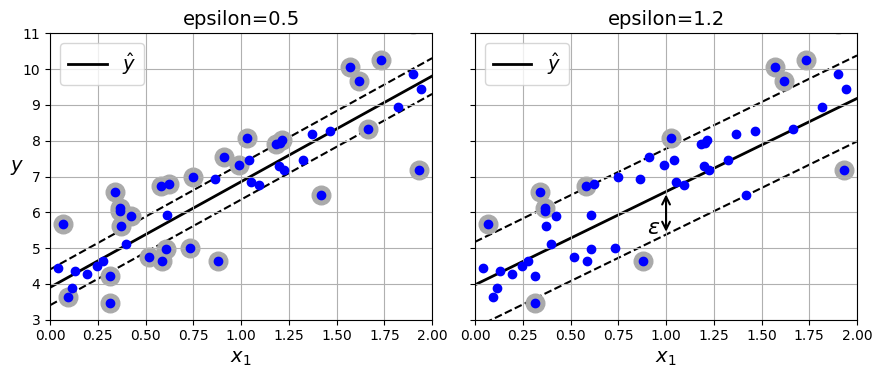

In [19]:
# extra code – this cell generates and saves Figure 5–10

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    epsilon = svm_reg[-1].epsilon
    off_margin = np.abs(y - y_pred) >= epsilon
    return np.argwhere(off_margin)

def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    epsilon = svm_reg[-1].epsilon
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$", zorder=-2)
    plt.plot(x1s, y_pred + epsilon, "k--", zorder=-2)
    plt.plot(x1s, y_pred - epsilon, "k--", zorder=-2)
    plt.scatter(X[svm_reg._support], y[svm_reg._support], s=180,
                facecolors='#AAA', zorder=-1)
    plt.plot(X, y, "bo")
    plt.xlabel("$x_1$")
    plt.legend(loc="upper left")
    plt.axis(axes)

svm_reg2 = make_pipeline(StandardScaler(),
                         LinearSVR(epsilon=1.2, dual=True, random_state=42))
svm_reg2.fit(X, y)

svm_reg._support = find_support_vectors(svm_reg, X, y)
svm_reg2._support = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg2.predict([[eps_x1]])[0]

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg2[-1].epsilon}")
plt.annotate(
        '', 
    xy=(eps_x1, eps_y_pred),
    xytext=(eps_x1, eps_y_pred - svm_reg2[-1].epsilon),
    textcoords='data',
    arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.90, 5.4, r"$\epsilon$", fontsize=16)
plt.grid()
save_fig("svm_regression_plot")
plt.show()

* **Support Vector Machines can be used for regression** (called **SVM Regression** or **SVR**).

* Key idea difference from classification:

  * **Classification**:

    * Tries to separate classes with the **widest possible margin**
  * **Regression**:

    * Tries to fit as many data points as possible **inside a margin (street)**

* In SVM regression:

  * The model fits a function
  * A **tube (street)** is drawn around it
  * Errors are allowed **as long as they fall inside the tube**

* **Margin (tube) width** is controlled by the hyperparameter:

  * ( \epsilon )

* Interpretation of ( \epsilon ):

  * Defines how far predictions can deviate from true targets
  * Errors within ( \pm \epsilon ) are **ignored**

* Example:

  * ( \epsilon = 0.5 ):

    * Narrow tube
    * Stricter fitting
  * ( \epsilon = 1.2 ):

    * Wider tube
    * More tolerance

* Effect of reducing ( \epsilon ):

  * Tube becomes **narrower**
  * More points lie **outside the margin**
  * **More support vectors**
  * Stronger **regularization effect**

* Effect of increasing ( \epsilon ):

  * Tube becomes **wider**
  * Fewer support vectors
  * Model becomes **less sensitive** to small deviations

* **Support vectors in SVR**:

  * Points that lie **outside the ( \epsilon )-tube**
  * Points exactly on the boundary of the tube

* Important property: **( \epsilon )-insensitivity**

  * Training instances **inside the margin**:

    * Do **not** affect the model
  * Adding more points inside the tube:

    * Does **not change predictions**

* Practical implication:

  * SVR ignores small errors
  * Focuses only on **significant deviations**

* Key takeaway:

  * ( \epsilon ) controls:

    * Model tolerance
    * Number of support vectors
    * Degree of regularization


---

In [20]:
from sklearn.svm import SVR

# extra code – these 3 lines generate a simple quadratic dataset
np.random.seed(42)
X = 2 * np.random.rand(50, 1) - 1
y = 0.2 + 0.1 * X[:, 0] + 0.5 * X[:, 0] ** 2 + np.random.randn(50) / 10

svm_poly_reg = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1))
svm_poly_reg.fit(X, y)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('standardscaler', ...), ('svr', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm.If none is given, 'rbf' will be used. If a callable is given it isused to precompute the kernel matrix.For an intuitive visualization of different kernel typessee :ref:`sphx_glr_auto_examples_svm_plot_svm_regression.py`",'poly'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",2
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0


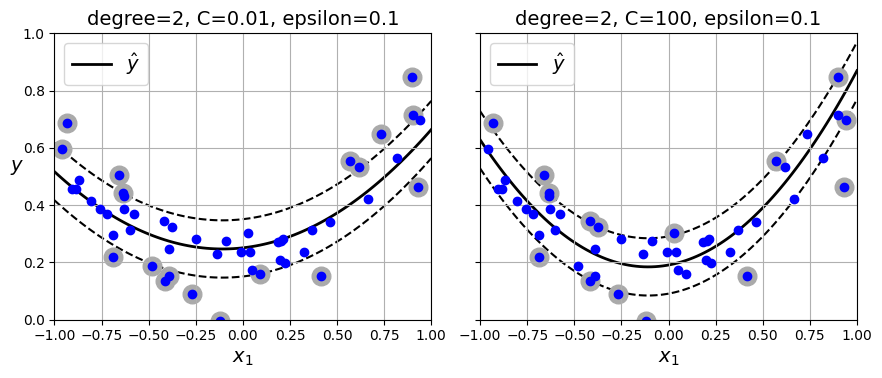

In [21]:
# extra code – this cell generates and saves Figure 5–11

svm_poly_reg2 = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=100))
svm_poly_reg2.fit(X, y)

svm_poly_reg._support = find_support_vectors(svm_poly_reg, X, y)
svm_poly_reg2._support = find_support_vectors(svm_poly_reg2, X, y)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg, X, y, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg[-1].degree}, "
          f"C={svm_poly_reg[-1].C}, "
          f"epsilon={svm_poly_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()

plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg2[-1].degree}, "
          f"C={svm_poly_reg2[-1].C}, "
          f"epsilon={svm_poly_reg2[-1].epsilon}")
plt.grid()
save_fig("svm_with_polynomial_kernel_plot")
plt.show()

* **Nonlinear regression with SVMs**:

  * Achieved using **kernelized SVM regression**
  * Allows modeling **nonlinear relationships** between features and target

* **Polynomial kernel for regression**:

  * Useful when the underlying relationship is polynomial (e.g., quadratic)
  * Example shown uses a **second-degree polynomial kernel**

* Effect of **regularization parameter C** in SVR:

  * Small ( C ):

    * Strong regularization
    * Smoother regression function
    * Higher bias, lower variance
  * Large ( C ):

    * Weak regularization
    * Regression curve fits training data more closely
    * Higher risk of overfitting

* Interpretation of the example:

  * Left plot:

    * Small ( C )
    * More regularization
    * Simpler curve
  * Right plot:

    * Large ( C )
    * Less regularization
    * More complex curve

* Example SVR pipeline:

  * `StandardScaler`:

    * Scales features (important for kernel methods)
  * `SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1)`:

    * Polynomial kernel of degree 2
    * ( C = 0.01 ): strong regularization
    * ( \epsilon = 0.1 ): width of the ( \epsilon )-tube

* Role of ( \epsilon ) in SVR:

  * Defines the tolerance margin around predictions
  * Errors within ( \pm \epsilon ) are ignored
  * Controls sensitivity to noise

* **SVR vs SVC**:

  * SVR:

    * Regression counterpart of SVC
    * Supports the kernel trick
  * SVC:

    * Classification counterpart

* **LinearSVR vs LinearSVC**:

  * LinearSVR:

    * Regression version of LinearSVC
    * Scales linearly with dataset size
    * Suitable for very large datasets
  * LinearSVC:

    * Classification version

* Scalability comparison:

  * **SVR**:

    * Powerful for nonlinear regression
    * Becomes **very slow** for large datasets
  * **LinearSVR**:

    * Fast and scalable
    * Limited to linear regression functions

* Practical takeaway:

  * Small/medium nonlinear regression → **SVR**
  * Large-scale regression → **LinearSVR**
  * Always scale features before using SVR


# Under the Hood of Linear SVM Classifiers

>Up to now, I have used the convention of putting all the model parameters in one vector θ,
including the bias term θ and the input feature weights θ to θ . This required adding a
bias input x = 1 to all instances. Another very common convention is to separate the bias
term b (equal to θ ) and the feature weights vector w (containing θ to θ ). In this case, no
bias feature needs to be added to the input feature vectors, and the linear SVM’s decision
function is equal to $$w x + b = w x + ⋯ + w x + b$$. I will use this convention throughout
the rest of this book.

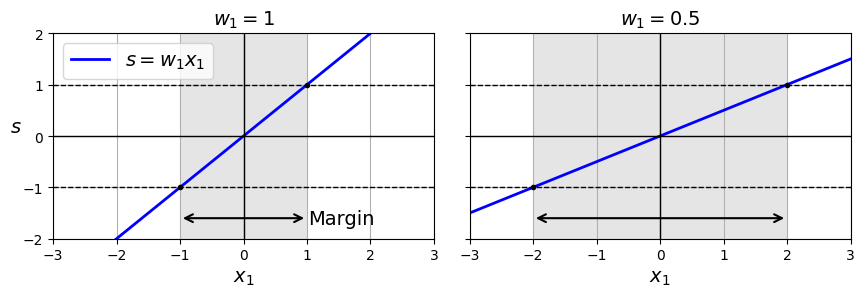

In [22]:
# extra code – this cell generates and saves Figure 5–12

import matplotlib.patches as patches

def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1 + b
    half_margin = 1 / w

    plt.plot(x1, y, "b-", linewidth=2, label=r"$s = w_1 x_1$")
    plt.axhline(y=0, color='k', linewidth=1)
    plt.axvline(x=0, color='k', linewidth=1)
    rect = patches.Rectangle((-half_margin, -2), 2 * half_margin, 4,
                             edgecolor='none', facecolor='gray', alpha=0.2)
    plt.gca().add_patch(rect)
    plt.plot([-3, 3], [1, 1], "k--", linewidth=1)
    plt.plot([-3, 3], [-1, -1], "k--", linewidth=1)
    plt.plot(half_margin, 1, "k.")
    plt.plot(-half_margin, -1, "k.")
    plt.axis(x1_lim + [-2, 2])
    plt.xlabel("$x_1$")
    if ylabel:
        plt.ylabel("$s$", rotation=0, labelpad=5)
        plt.legend()
        plt.text(1.02, -1.6, "Margin", ha="left", va="center", color="k")

    plt.annotate(
        '', xy=(-half_margin, -1.6), xytext=(half_margin, -1.6),
        arrowprops={'ec': 'k', 'arrowstyle': '<->', 'linewidth': 1.5}
    )
    plt.title(f"$w_1 = {w}$")

fig, axes = plt.subplots(ncols=2, figsize=(9, 3.2), sharey=True)
plt.sca(axes[0])
plot_2D_decision_function(1, 0)
plt.grid()
plt.sca(axes[1])
plot_2D_decision_function(0.5, 0, ylabel=False)
plt.grid()
save_fig("small_w_large_margin_plot")
plt.show()

* A **linear SVM classifier** predicts the class of a new instance ( x ) using a **decision function**.

* Decision function:

  * ( $f(x) = \theta_0 x_0 + \theta_1 x_1 + \cdots + \theta_n x_n $)
  * Bias feature:

    * ($ x_0 = 1$ )

* Prediction rule:

  * If ( $f(x) > 0$ ) → predicted class ( $\hat{y} = 1$ )
  * If ( $f(x) \le 0$ ) → predicted class ($ \hat{y} = 0 $)

* This prediction mechanism is **identical to LogisticRegression** (without probabilities).

* Training a linear SVM:

  * Goal: find:

    * Weight vector ( w )
    * Bias term ( b )
  * Such that:

    * The **margin (street)** is as wide as possible
    * Margin violations are avoided (hard margin case)

* Relationship between margin and weights:

  * Margin width is **inversely proportional** to the norm of ( w )
  * Smaller ( $|w|$ ) → larger margin

* Geometric intuition (1D example):

  * Decision boundary: ( $w x + b = 0$ )
  * Street borders defined by:

    * $( w x + b = -1 )$
    * $( w x + b = +1 )$

* Example:

  * If ( w = 1 ):

    * Borders at ( x = -1 ) and ( x = +1 )
    * Margin width = ( 2 )
  * If ( w = 0.5 ):

    * Borders at ( x = -2 ) and ( x = +2 )
    * Margin width = ( 4 )

* Conclusion:

  * **Reducing ( w )** increases the margin width

* Role of bias term ( b ):

  * Does **not affect margin size**
  * Only shifts the margin left or right

* Margin constraints (hard margin):

  * Positive instances must lie **beyond +1**
  * Negative instances must lie **below –1**

* Define class labels:

  * ( $t^{(i)} = +1$ ) for positive class
  * ( $t^{(i)} = -1$ ) for negative class

* Constraint for every training instance:

  * ($ t^{(i)} ( w^\top x^{(i)} + b ) \ge 1 $)

* Interpretation of the constraint:

  * Ensures:

    * Correct classification
    * No instance lies inside the margin
  * Enforces **zero margin violations**

* Hard margin linear SVM objective:

  * Minimize the norm of the weight vector
  * While satisfying all margin constraints

* Optimization problem:

  * **Minimize**:

    * ( $\dfrac{1}{2} w^\top w$ )
  * **Subject to**:

    * ( $t^{(i)} ( w^\top x^{(i)} + b ) \ge 1$ )
    * for ($ i = 1, 2, \ldots, m $)

* Why minimize ($ \frac{1}{2} w^\top w $):

  * Equivalent to minimizing ($ |w|^2 $)
  * Makes the margin as wide as possible
  * Simplifies mathematical optimization

* Key takeaway:

  * Hard margin SVM = **maximize margin + zero violations**
  * Works only for **perfectly linearly separable data**


* The objective minimizes
  ( $\dfrac{1}{2}, w^\top w$ ),
  which is equivalent to
  ( $\dfrac{1}{2}, |w|^2$ )

* We **do not minimize** ($ |w| $) directly

* Reason for minimizing ( $\dfrac{1}{2}|w|^2 $):

  *  Its gradient is **simple and well-defined**:

    ($ \nabla_w \left( \dfrac{1}{2} w^\top w \right) = w $)
  * This makes optimization **efficient and stable**

* In contrast, the norm:

  ( $|w| = \sqrt{w^\top w} $)

  * Is **not differentiable at** ( w = 0 )

* Non-differentiability at ( w = 0 ):

  * Causes problems for gradient-based optimization methods
  * Makes convergence slower or unstable

* Optimization algorithms generally:

  * Prefer **smooth (differentiable)** objective functions
  * Perform much better when gradients are:

    * Continuous
    * Easy to compute

* Therefore:

  * Minimizing ($ \dfrac{1}{2}|w|^2$ ) is mathematically convenient
  * It leads to the **same solution** as minimizing ( $|w|$ )
  * But with **better optimization behavior**

* Key takeaway:

  * The squared norm is chosen **for optimization convenience**, not because it changes the goal


---

* To move from **hard margin** to **soft margin**, we introduce **slack variables**.

* For each training instance ( i ), define a slack variable:

  * ($ \zeta^{(i)} \ge 0 $)

* Meaning of slack variable ( $\zeta^{(i)} $):

  * Measures **how much the instance violates the margin**
  * Cases:

    * ( $\zeta^{(i)} = 0$ ) → instance is correctly classified and **outside the margin**
    * ( $0 < \zeta^{(i)} < 1$ ) → instance lies **inside the margin**
    * ( $\zeta^{(i)} \ge 1$ ) → instance is **misclassified**

* With slack variables, we now have **two conflicting objectives**:

  * Minimize ( $\dfrac{1}{2} w^\top w$ )

    * Maximizes the margin
  * Minimize ( $\sum_{i=1}^{m} \zeta^{(i)} $)

    * Reduces margin violations

* These objectives conflict because:

  * Increasing margin → may increase violations
  * Reducing violations → may shrink the margin

* The **regularization hyperparameter ( C )** controls the trade-off:

  * Large ( C ):

    * High penalty for violations
    * Model prioritizes fitting training data
    * Smaller margin
    * Higher risk of overfitting
  * Small ( C ):

    * Allows more violations
    * Larger margin
    * Better generalization
    * Risk of underfitting

* Soft margin constraints:

  *  Replace hard margin constraint with:

    ($$ t^{(i)} ( w^\top x^{(i)} + b ) \ge 1 - \zeta^{(i)} $$)
  *  Enforce non-negativity:

    ( $\zeta^{(i)} \ge 0$ )

* **Soft margin linear SVM optimization problem**:

  *  **Minimize**:

    ($$ \dfrac{1}{2} w^\top w + C \sum_{i=1}^{m} \zeta^{(i)} $$)

  *  **Subject to**:

     ( $$t^{(i)} ( w^\top x^{(i)} + b ) \ge 1 - \zeta^{(i)}$$ )

    ( $$\zeta^{(i)} \ge 0 $$)

    * for ($ i = 1, 2, \ldots, m $)

* Interpretation:

  * First term → controls **margin size**
  * Second term → penalizes **margin violations**
  * ( C ) balances **margin maximization vs error tolerance**

* Key takeaway:

  * Soft margin SVM allows imperfect separation
  * Makes SVMs robust to noise and outliers
  * Essential for real-world datasets


## Quadratic Programming

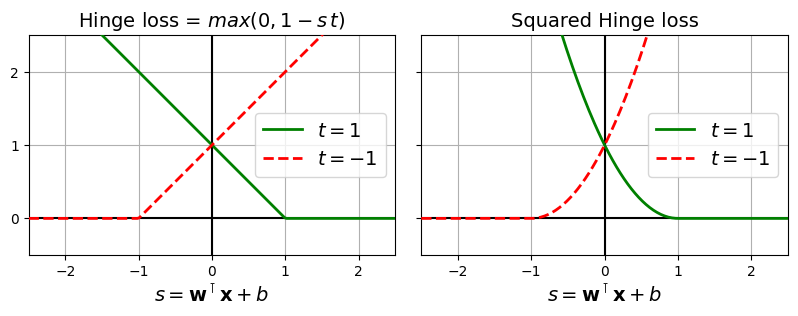

In [23]:
# extra code – this cell generates and saves Figure 5–13

s = np.linspace(-2.5, 2.5, 200)
hinge_pos = np.where(1 - s < 0, 0, 1 - s)  # max(0, 1 - s)
hinge_neg = np.where(1 + s < 0, 0, 1 + s)  # max(0, 1 + s)

titles = (r"Hinge loss = $max(0, 1 - s\,t)$", "Squared Hinge loss")

fix, axs = plt.subplots(1, 2, sharey=True, figsize=(8.2, 3))

for ax, loss_pos, loss_neg, title in zip(
        axs, (hinge_pos, hinge_pos ** 2), (hinge_neg, hinge_neg ** 2), titles):
    ax.plot(s, loss_pos, "g-", linewidth=2, zorder=10, label="$t=1$")
    ax.plot(s, loss_neg, "r--", linewidth=2, zorder=10, label="$t=-1$")
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.set_xlabel(r"$s = \mathbf{w}^\intercal \mathbf{x} + b$")
    ax.axis([-2.5, 2.5, -0.5, 2.5])
    ax.legend(loc="center right")
    ax.set_title(title)
    ax.set_yticks(np.arange(0, 2.5, 1))
    ax.set_aspect("equal")

save_fig("hinge_plot")
plt.show()

* Both **hard margin** and **soft margin** SVM formulations are:

  * **Convex quadratic optimization problems**
  * Have **linear constraints**

* Such optimization problems are called **Quadratic Programming (QP) problems**:

  * Quadratic objective function
  * Linear inequality constraints
  * Convex → guarantees a **global minimum**

* Training an SVM using QP:

  * Possible via **off-the-shelf QP solvers**
  * These solvers use advanced optimization techniques
  * Details are beyond the scope of the book

* Alternative to QP solvers:

  * Use **gradient-based optimization**
  * Minimize a **loss function** instead of solving constraints directly

* Common loss functions for SVMs:

  * **Hinge loss**
  * **Squared hinge loss**

* Define:

  * Decision function output:
    ( $s = w^\top x + b$ )
  * Class label:

    * ( $t = +1$ ) → positive class
    * ( $t = -1$ ) → negative class

* **Hinge loss**:

  * Loss function:

    ($ \max(0,; 1 - t \cdot s) $)
  * Loss is **0** when:

    * ( $t \cdot s \ge 1$ )
    * Instance is correctly classified and **outside the margin**
  * Loss increases **linearly** as the instance moves further into the wrong side

* **Squared hinge loss**:

  *  Loss function:

    ( $\max(0,; 1 - t \cdot s)^2$ )
  * Penalizes violations **quadratically**
  * More sensitive to:

    * Large margin violations
    * Outliers

* Loss behavior by class:

  * Positive class (( t = 1 )):

    * Loss = 0 if ( $s \ge 1$ )
  * Negative class (( t = -1 )):

    * Loss = 0 if ($ s \le -1$ )

* Interpretation:

  * Instances **off the street and on the correct side**:

    * Zero loss
  * Instances **inside the margin or misclassified**:

    * Positive loss
    * Larger violation → larger loss

* Comparison of hinge vs squared hinge loss:

  * Hinge loss:

    * Linear penalty
    * More robust to outliers
  * Squared hinge loss:

    * Quadratic penalty
    * More sensitive to outliers
    * Faster convergence on clean datasets

* Scikit-Learn defaults:

  * **LinearSVC**:

    * Uses **squared hinge loss** by default
  * **SGDClassifier**:

    * Uses **hinge loss** by default

* Customizing loss function:

  * Both `LinearSVC` and `SGDClassifier` allow:

    * `loss="hinge"`
    * `loss="squared_hinge"`

* **SVC optimization**:

  * Uses a different internal algorithm
  * Finds a solution equivalent to **hinge loss minimization**

* Key takeaway:

  * SVM training can be framed as:

    * Constrained QP optimization
    * Or unconstrained loss minimization
  * Choice of loss affects:

    * Sensitivity to outliers
    * Convergence behavior


# The Dual Problem

* In constrained optimization, the original problem is called the **primal problem**.

* For many primal problems, we can derive a closely related problem called the **dual problem**.

* Relationship between primal and dual:

  * The dual problem typically provides a **lower bound** to the primal solution.
  * Under certain conditions, both problems have the **same optimal solution**.
  * These conditions are satisfied for **SVMs**.
  * Therefore, solving either the primal or the dual gives the **same result**.

* For SVMs:

  * You are free to solve:

    * The **primal problem** (in terms of ( w ) and ( b ))
    * Or the **dual problem** (in terms of ( $\alpha$ ))
  * Both lead to the same optimal classifier.

* **Dual form of the linear SVM objective**:

  * Introduces one variable ( $\alpha^{(i)}$ ) per training instance
  * These variables measure how much each instance influences the solution

* Dual optimization problem:

  *  **Minimize**:

    $$( \dfrac{1}{2} \sum_{i=1}^{m} \sum_{j=1}^{m} \alpha^{(i)} \alpha^{(j)} t^{(i)} t^{(j)} , x^{(i)\top} x^{(j)} ;-; \sum_{i=1}^{m} \alpha^{(i)} )$$

  *  **Subject to**:

    $$ ( \alpha^{(i)} \ge 0 \quad \text{for } i = 1, 2, \ldots, m )$$

    $$( \sum_{i=1}^{m} \alpha^{(i)} t^{(i)} = 0 )$$

* Interpretation of ($ \alpha^{(i)} $):

  * If ( $\alpha^{(i)} = 0 $):

    * Instance ( i ) does **not** affect the model
  * If ( $\alpha^{(i)} > 0$ ):

    * Instance ( i ) is a **support vector**
  * Only support vectors influence the final decision boundary

* After solving the dual problem:

  * Obtain optimal coefficients ( $\hat{\alpha}$ )
  * Use them to recover the **primal parameters**

* Recovering the primal solution from the dual:

  *  Weight vector:

    $$( \hat{w} = \sum_{i=1}^{m} \hat{\alpha}^{(i)} , t^{(i)} , x^{(i)} )$$

  *  Bias term:

    $$( \hat{b} = \dfrac{1}{n_s} \sum_{\substack{i=1 \ \hat{\alpha}^{(i)} > 0}}^{m} \left( t^{(i)} - \hat{w}^\top x^{(i)} \right) )$$

  * Where:

    * ( $n_s$ ) = number of support vectors

* Advantages of the dual problem:

  * Faster to solve when:

    * Number of training instances ( m ) is **smaller** than number of features ( n )
  * Depends only on **dot products**:

    * $$( x^{(i)\top} x^{(j)} )$$

* Crucial implication:

  * Because the dual depends only on dot products,
  * We can replace them with **kernel functions**

* Key takeaway:

  * The **kernel trick** is possible **only because of the dual formulation**
  * This enables SVMs to learn nonlinear decision boundaries efficiently


## Kernelized SVMs

* Goal:

  * Apply a **second-degree polynomial feature transformation** to a 2D dataset
  * Then train a **linear SVM** on the transformed data

* **Second-degree polynomial mapping** ($ \phi $):

  *  Original input:

    $$( x = \begin{bmatrix} x_1 \ x_2 \end{bmatrix} )$$
  *  Transformed feature vector:

    $$( \phi(x) =
    \begin{bmatrix}
    x_1^2 \
    \sqrt{2},x_1 x_2 \
    x_2^2
    \end{bmatrix} )$$
  * Dimensionality increases:

    * From **2D → 3D**

* Consider two original vectors:

  $$( a = \begin{bmatrix} a_1 \ a_2 \end{bmatrix}, \quad
  b = \begin{bmatrix} b_1 \ b_2 \end{bmatrix} )$$

*  Apply the polynomial mapping:

 $$ ( \phi(a) =
  \begin{bmatrix}
  a_1^2 \
  \sqrt{2},a_1 a_2 \
  a_2^2
  \end{bmatrix}, \quad
  \phi(b) =
  \begin{bmatrix}
  b_1^2 \
  \sqrt{2},b_1 b_2 \
  b_2^2
  \end{bmatrix} )$$

* Compute dot product in transformed space:

 $$ ( \phi(a)^\top \phi(b)
  = a_1^2 b_1^2 + 2 a_1 a_2 b_1 b_2 + a_2^2 b_2^2 )$$

* Factorization result:

  $$( \phi(a)^\top \phi(b)
  = (a_1 b_1 + a_2 b_2)^2 )$$

* Observe:

  *  Original dot product:

    $$( a^\top b = a_1 b_1 + a_2 b_2 )$$
  * Therefore:

    $$( \phi(a)^\top \phi(b) = (a^\top b)^2 )$$

* **Key insight**:

  * The dot product in transformed (higher-dimensional) space
  * Equals the **square of the dot product in original space**

* Connection to the dual SVM problem:

  *  The dual formulation depends **only on dot products**:

   $$ ( x^{(i)\top} x^{(j)} )$$
  *  After transformation, it would require:

   $$ ( \phi(x^{(i)})^\top \phi(x^{(j)}) )$$

* Kernel trick application:

  * Instead of explicitly computing ( $\phi(x)$ ),
  *  Replace:

   $$ ( \phi(x^{(i)})^\top \phi(x^{(j)}) ;\rightarrow; (x^{(i)\top} x^{(j)})^2 )$$

* Result:

  * Same solution as:

    * Explicit polynomial feature expansion
    * Followed by a linear SVM
  * But with **much lower computational cost**

* **Essence of the kernel trick**:

  * Work in a high-dimensional feature space
  * Without explicitly computing the feature mapping
  * By replacing dot products with a **kernel function**

* **Polynomial kernel (degree 2)**:

  $$( K(a, b) = (a^\top b)^2 )$$

* Definition of a kernel:

  *  A function ( K(a, b) ) that computes:

   $$ ( \phi(a)^\top \phi(b) )$$
  * Using only the original vectors ( a ) and ( b )
  * Without explicitly knowing or computing ($ \phi $)

* **Common kernel functions**:

  *  Linear kernel:

    $$( K(a, b) = a^\top b )$$

  * Polynomial kernel:

    $$( K(a, b) = (\gamma, a^\top b + r)^d )$$

  *  Gaussian RBF kernel:

    $$( K(a, b) = \exp!\left(-\gamma |a - b|^2\right) )$$

  *  Sigmoid kernel:

   $$ ( K(a, b) = \tanh(\gamma, a^\top b + r) )$$

* Core takeaway:

  * The kernel trick enables **nonlinear learning**
  * While keeping computations efficient
  * By replacing dot products with kernel functions


---

* **Mercer’s Theorem** provides the theoretical foundation for **kernel methods**.

* Statement of Mercer’s theorem:

  * If a function ( K(a, b) ) satisfies **Mercer’s conditions**, then:

    * There exists a feature mapping ( $\phi $)
    *  Such that:

      $$( K(a, b) = \phi(a)^\top \phi(b) )$$

* Mercer’s conditions (informal):

  * ( K(a, b) ) must be:

    * **Continuous**
    *  **Symmetric**:

      $( K(a, b) = K(b, a) )$
    * **Positive semi-definite** (implied by the theorem)

* Meaning of the theorem:

  * Even if we do **not know** the explicit mapping ( $\phi$ ),
  * We are guaranteed that such a mapping **exists**
  * This allows us to safely use ( K ) as a **kernel function**

* Practical implication:

  * Kernel methods operate in a (possibly very high-dimensional) feature space
  * Without explicitly computing the transformation ( $\phi $)

* Gaussian RBF kernel case:

  $$( K(a, b) = \exp!\left(-\gamma |a - b|^2\right) )$$

  * The corresponding feature mapping ($ \phi $):

    * Maps data into an **infinite-dimensional space**
  * Explicit computation would be impossible
  * Kernel trick makes this feasible

* Why the kernel trick is essential:

  * Avoids:

    * Infinite-dimensional feature construction
    * Massive computational cost
  * Still achieves powerful nonlinear modeling

* Important note:

  * Some commonly used kernels:

    * Do **not strictly satisfy** all of Mercer’s conditions
    * Example:

      * Sigmoid kernel

* Despite this:

  * These kernels often:

    * Work well empirically
    * Produce useful decision boundaries in practice

* Key takeaway:

  * Mercer’s theorem guarantees when a kernel corresponds to a valid feature space
  * Kernel methods rely on this guarantee
  * In practice, even imperfect kernels can still perform well


---

* Problem to resolve:

  * For **kernelized SVMs**, the weight vector ( $\hat{w}$ ) lives in the feature space defined by ($ \phi(x)$ )
  * This space may be **very high-dimensional or infinite**
  * Therefore, ( $\hat{w}$ ) **cannot be computed or stored explicitly**

*  Recall from the dual solution:

  $$( \hat{w} = \sum_{i=1}^{m} \hat{\alpha}^{(i)} t^{(i)} \phi(x^{(i)}) )$$

* Issue:

  * ( $\phi(x)$ ) is unknown or intractable
  * Direct computation of ($ \hat{w} $) is impossible

* Key idea:

  * We **do not need ( $\hat{w}$ ) explicitly** to make predictions
  * We only need the **decision function**

*  Decision function for a new instance ( $x^{(n)}$ ):

  $$( h_{\hat{w},\hat{b}}(\phi(x^{(n)})) = \hat{w}^\top \phi(x^{(n)}) + \hat{b} )$$

*  Substitute ( $\hat{w}$ ) using the dual formulation:

  $$( \hat{w}^\top \phi(x^{(n)})
  = \left( \sum_{i=1}^{m} \hat{\alpha}^{(i)} t^{(i)} \phi(x^{(i)}) \right)^\top \phi(x^{(n)}) )$$

*  Expand the dot product:

  $$( = \sum_{i=1}^{m} \hat{\alpha}^{(i)} t^{(i)} , \phi(x^{(i)})^\top \phi(x^{(n)}) )$$

*  Apply the **kernel trick**:

  $$( \phi(x^{(i)})^\top \phi(x^{(n)}) = K(x^{(i)}, x^{(n)}) )$$

* Final prediction equation:

  $$( h(x^{(n)}) = \sum_{i=1}^{m} \hat{\alpha}^{(i)} t^{(i)} K(x^{(i)}, x^{(n)}) + \hat{b} )$$

* Important simplification:

  * $( \hat{\alpha}^{(i)} \neq 0 )$ **only for support vectors**
  * Therefore:

    * The sum effectively runs over **support vectors only**
    * Prediction does **not** depend on all training instances

* Computational implication:

  * Prediction complexity depends on:

    * Number of **support vectors**
    * Not total dataset size

* Computing the bias term ( $\hat{b}$ ):

  * Bias must also be computed using the kernel trick

*  Bias computation formula:

  $$( \hat{b}
  = \dfrac{1}{n_s}
  \sum_{\substack{i=1 \ \hat{\alpha}^{(i)} > 0}}^{m}
  \left(
  t^{(i)} - \hat{w}^\top \phi(x^{(i)})
  \right) )$$

* Substitute ( $\hat{w}$ ) again:

  $$( \hat{w}^\top \phi(x^{(i)})
  = \sum_{j=1}^{m} \hat{\alpha}^{(j)} t^{(j)} \phi(x^{(j)})^\top \phi(x^{(i)}) )$$

*  Apply kernel trick:

  $$( = \sum_{j=1}^{m} \hat{\alpha}^{(j)} t^{(j)} K(x^{(j)}, x^{(i)}) )$$

*  Final bias expression:

  $$( \hat{b}
  = \dfrac{1}{n_s}
  \sum_{\substack{i=1 \ \hat{\alpha}^{(i)} > 0}}^{m}
  \left(
  t^{(i)} -
  \sum_{\substack{j=1 \ \hat{\alpha}^{(j)} > 0}}^{m}
  \hat{\alpha}^{(j)} t^{(j)} K(x^{(i)}, x^{(j)})
  \right) )$$

* Summary of what actually happens in kernelized SVMs:

  * No explicit computation of:

    * ( $\phi(x)$ )
    * ( $\hat{w}$ )
  * Everything is expressed using:

    * Kernel evaluations ( $K(x^{(i)}, x^{(j)})$ )
  * Only **support vectors** matter

* Core takeaway:

  * Kernelized SVMs:

    * Never leave the original input space
    * Yet behave as if operating in a high- or infinite-dimensional space
  * This computational sleight of hand is **the kernel trick**

* Final reassurance:

  * If this feels mentally heavy, that’s normal
  * The math is dense, but the implementation hides almost all of it


> It is also possible to implement online kernelized SVMs, capable of incremental learning,
as described in the papers “Incremental and Decremental Support Vector Machine
Learning”⁠ and “Fast Kernel Classifiers with Online and Active Learning”.⁠ These
kernelized SVMs are implemented in Matlab and C++. But for large-scale nonlinear
problems, you may want to consider using random forests (see Chapter 7) or neural
networks (see Part II)

## Online SVMs

* **Online SVM classifiers**:

  * Learn **incrementally**
  * Update the model as **new instances arrive**
  * Useful for:

    * Streaming data
    * Very large datasets

* For **linear SVM classifiers**, online learning can be done using:

  * **Gradient Descent**
  * Example implementation:

    * `SGDClassifier` in Scikit-Learn

* Gradient Descent approach:

  * Minimizes a **cost function**
  * Derived from the **primal SVM formulation**
  * Converges **slower** than QP-based methods
  * But supports:

    * Incremental learning
    * Low memory usage

---

* **Linear SVM cost function**:

  $$
  J(w, b) =
  \frac{1}{2} , w^\top w+
  C \sum_{i=1}^{m}
  \max!\left(0,; 1 - t^{(i)}(w^\top x^{(i)} + b)\right)
  $$

---

* **First term**:
  $$
  \frac{1}{2} , w^\top w
  $$

  * Penalizes large weights
  * Encourages **small ( |w| )**
  * Leads to a **larger margin**

---

* **Second term (hinge loss)**:
  $$
  \max!\left(0,; 1 - t^{(i)}(w^\top x^{(i)} + b)\right)
  $$

  * Measures **margin violation** for each instance

* Margin violation behavior:

  * If:
    $$
    t^{(i)}(w^\top x^{(i)} + b) \ge 1
    $$

    * Instance is:

      * Correctly classified
      * Outside the margin
    * Loss = **0**
  * Otherwise:

    * Instance lies inside the margin or is misclassified
    * Loss increases **linearly** with distance from the correct side

---

* **Role of ( C )**:

  * Controls the trade-off between:

    * Large margin
    * Small margin violations
  * Large ( C ):

    * Strong penalty for violations
    * Less regularization
  * Small ( C ):

    * More tolerance to violations
    * Stronger regularization

---

* **Interpretation of the total cost**:

  * First term:

    * Maximizes margin
  * Second term:

    * Minimizes number and magnitude of violations
  * Joint minimization ensures:

    * Few violations
    * Violations are as small as possible

---

* **Practical takeaway**:

  * SGD-based SVMs:

    * Scale well to large datasets
    * Support online learning
  * QP-based SVMs:

    * Faster convergence
    * Better for smaller datasets
  * Both optimize the same **large-margin principle**


# Extra Material

## Linear SVM classifier implementation using Batch Gradient Descent

In [24]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)

In [25]:
from sklearn.base import BaseEstimator

class MyLinearSVC(BaseEstimator):
    def __init__(self, C=1, eta0=1, eta_d=10000, n_epochs=1000,
                 random_state=None):
        self.C = C
        self.eta0 = eta0
        self.n_epochs = n_epochs
        self.random_state = random_state
        self.eta_d = eta_d

    def eta(self, epoch):
        return self.eta0 / (epoch + self.eta_d)
        
    def fit(self, X, y):
        # Random initialization
        if self.random_state:
            np.random.seed(self.random_state)
        w = np.random.randn(X.shape[1], 1)  # n feature weights
        b = 0

        t = np.array(y, dtype=np.float64).reshape(-1, 1) * 2 - 1
        X_t = X * t
        self.Js = []

        # Training
        for epoch in range(self.n_epochs):
            support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
            X_t_sv = X_t[support_vectors_idx]
            t_sv = t[support_vectors_idx]

            J = 1/2 * (w * w).sum() + self.C * ((1 - X_t_sv.dot(w)).sum() - b * t_sv.sum())
            self.Js.append(J)

            w_gradient_vector = w - self.C * X_t_sv.sum(axis=0).reshape(-1, 1)
            b_derivative = -self.C * t_sv.sum()
                
            w = w - self.eta(epoch) * w_gradient_vector
            b = b - self.eta(epoch) * b_derivative
            

        self.intercept_ = np.array([b])
        self.coef_ = np.array([w])
        support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
        self.support_vectors_ = X[support_vectors_idx]
        return self

    def decision_function(self, X):
        return X.dot(self.coef_[0]) + self.intercept_[0]

    def predict(self, X):
        return self.decision_function(X) >= 0

In [26]:
C = 2
svm_clf = MyLinearSVC(C=C, eta0 = 10, eta_d = 1000, n_epochs=60000,
                      random_state=2)
svm_clf.fit(X, y)
svm_clf.predict(np.array([[5, 2], [4, 1]]))

array([[ True],
       [False]])

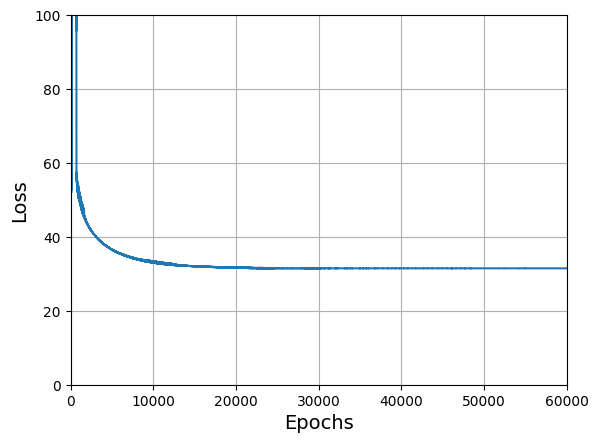

In [27]:
plt.plot(range(svm_clf.n_epochs), svm_clf.Js)
plt.axis([0, svm_clf.n_epochs, 0, 100])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

In [28]:
print(svm_clf.intercept_, svm_clf.coef_)

[-15.56761653] [[[2.28120287]
  [2.71621742]]]


In [29]:
svm_clf2 = SVC(kernel="linear", C=C)
svm_clf2.fit(X, y.ravel())
print(svm_clf2.intercept_, svm_clf2.coef_)

[-15.51721253] [[2.27128546 2.71287145]]


C:\Users\roush\AppData\Local\Temp\ipykernel_21364\1330771201.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  svm_clf2.fit(X, y.ravel())


C:\Users\roush\AppData\Local\Temp\ipykernel_21364\2600216369.py:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  yr = y.ravel()


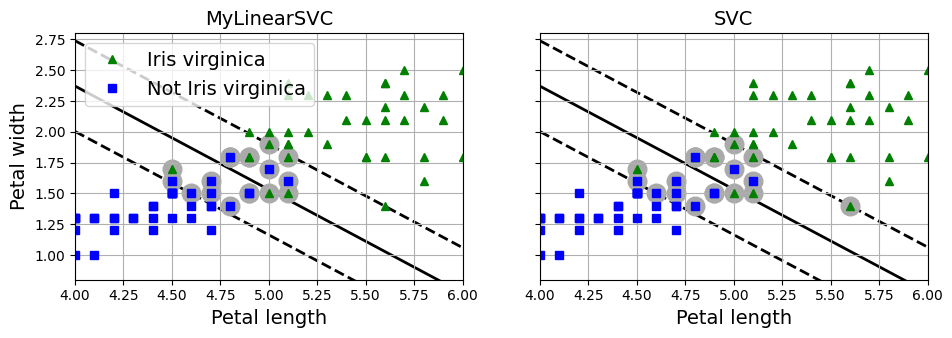

In [30]:
yr = y.ravel()
fig, axes = plt.subplots(ncols=2, figsize=(11, 3.2), sharey=True)
plt.sca(axes[0])
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs", label="Not Iris virginica")
plot_svc_decision_boundary(svm_clf, 4, 6)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("MyLinearSVC")
plt.axis([4, 6, 0.8, 2.8])
plt.legend(loc="upper left")
plt.grid()

plt.sca(axes[1])
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length")
plt.title("SVC")
plt.axis([4, 6, 0.8, 2.8])
plt.grid()

plt.show()

[-12.54479729   1.88004861   1.83792304]


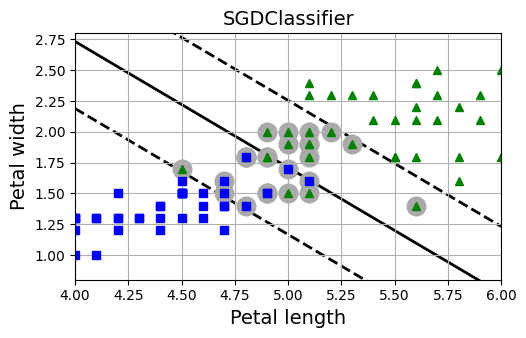

In [31]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="hinge", alpha=0.017, max_iter=1000, tol=1e-3,
                        random_state=42)
sgd_clf.fit(X, y)

m = len(X)
t = np.array(y).reshape(-1, 1) * 2 - 1  # -1 if y == 0, or +1 if y == 1
X_b = np.c_[np.ones((m, 1)), X]  # Add bias input x0=1
X_b_t = X_b * t
sgd_theta = np.r_[sgd_clf.intercept_[0], sgd_clf.coef_[0]]
print(sgd_theta)
support_vectors_idx = (X_b_t.dot(sgd_theta) < 1).ravel()
sgd_clf.support_vectors_ = X[support_vectors_idx]
sgd_clf.C = C

plt.figure(figsize=(5.5, 3.2))
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs")
plot_svc_decision_boundary(sgd_clf, 4, 6)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("SGDClassifier")
plt.axis([4, 6, 0.8, 2.8])
plt.grid()

plt.show()

# Exercise

## 1. What is the fundamental idea behind Support Vector Machines?

The fundamental idea behind Support Vector Machines is to fit the widest possible "street" between the classes. In other words, the goal is to have the largest possible margin between the decision boundary that separates the two classes and the training instances. When performing soft margin classification, the SVM searches for a compromise between perfectly separating the two classes and having the widest possible street (i.e., a few instances may end up on the street). Another key idea is to use kernels when training on nonlinear datasets. SVMs can also be tweaked to perform linear and nonlinear regression, as well as novelty detection.

## 2. What is a support vector?

After training an SVM, a support vector is any instance located on the "street" (see the previous answer), including its border. The decision boundary is entirely determined by the support vectors. Any instance that is not a support vector (i.e., is off the street) has no influence whatsoever; you could remove them, add more instances, or move them around, and as long as they stay off the street they won't affect the decision boundary. Computing the predictions with a kernelized SVM only involves the support vectors, not the whole training set.

## 3. Why is it important to scale the inputs when using SVMs?

SVMs try to fit the largest possible "street" between the classes (see the first answer), so if the training set is not scaled, the SVM will tend to neglect small features

## 4. Can an SVM classifier output a confidence score when it classifies an instance? What about a probability?

You can use the decision_function() method to get confidence scores. These scores represent the distance between the instance and the decision boundary. However, they cannot be directly converted into an estimation of the class probability. If you set probability=True when creating an SVC, then at the end of training it will use 5-fold cross-validation to generate out-of-sample scores for the training samples, and it will train a LogisticRegression model to map these scores to estimated probabilities. The predict_proba() and predict_log_proba() methods will then be available.

## 5. How can you choose between LinearSVC, SVC, and SGDClassifier?

All three classes can be used for large-margin linear classification. The `SVC` class also supports the kernel trick, which makes it capable of handling nonlinear tasks. However, this comes at a cost: the `SVC` class does not scale well to datasets with many instances. It does scale well to a large number of features, though. The `LinearSVC` class implements an optimized algorithm for linear SVMs, while `SGDClassifier` uses Stochastic Gradient Descent. Depending on the dataset `LinearSVC` may be a bit faster than `SGDClassifier`, but not always, and `SGDClassifier` is more flexible, plus it supports incremental learning.

## 6. Say you trained an SVM classifier with an RBF kernel. It seems to underfit the training set: should you increase or decrease γ (gamma)? What about C?

If an SVM classifier trained with an RBF kernel underfits the training set, there might be too much regularization. To decrease it, you need to increase `gamma` or `C` (or both).

## 7. What does it mean for a model to be ϵ-insensitive?

A Regression SVM model tries to fit as many instances within a small margin around its predictions. If you add instances within this margin, the model will not be affected at all: it is said to be _ϵ-insensitive_.

## 8. What is the point of using the kernel trick?

The kernel trick is mathematical technique that makes it possible to train a nonlinear SVM model. The resulting model is equivalent to mapping the inputs to another space using a nonlinear transformation, then training a linear SVM on the resulting high-dimensional inputs. The kernel trick gives the same result without having to transform the inputs at all.

## 9. Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.

In [32]:
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

Now let's build and train 3 models:
* Remember that `LinearSVC` uses `loss="squared_hinge"` by default, so if we want all 3 models to produce similar results, we need to set `loss="hinge"`.
* Also, the `SVC` class uses an RBF kernel by default, so we need to set `kernel="linear"` to get similar results as the other two models.
* Lastly, the `SGDClassifier` class does not have a `C` hyperparameter, but it has another regularization hyperparameter called `alpha`, so we can tweak it to get similar results as the other two models.

In [33]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5
alpha = 0.05

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf = LinearSVC(loss="hinge", C=C, dual=True, random_state=42).fit(X_scaled, y)
svc_clf = SVC(kernel="linear", C=C).fit(X_scaled, y)
sgd_clf = SGDClassifier(alpha=alpha, random_state=42).fit(X_scaled, y)

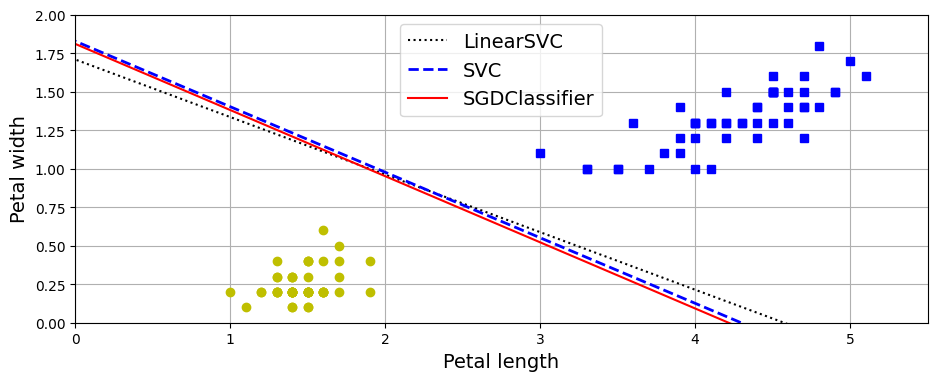

In [34]:
def compute_decision_boundary(model):
    w = -model.coef_[0, 0] / model.coef_[0, 1]
    b = -model.intercept_[0] / model.coef_[0, 1]
    return scaler.inverse_transform([[-10, -10 * w + b], [10, 10 * w + b]])

lin_line = compute_decision_boundary(lin_clf)
svc_line = compute_decision_boundary(svc_clf)
sgd_line = compute_decision_boundary(sgd_clf)

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(lin_line[:, 0], lin_line[:, 1], "k:", label="LinearSVC")
plt.plot(svc_line[:, 0], svc_line[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(sgd_line[:, 0], sgd_line[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper center")
plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.show()

## 10. Train an SVM classifier on the wine dataset, which you can load using sklearn.datasets.load_wine(). This dataset contains the chemical analyses of 178 wine samples produced by 3 different cultivators: the goal is to train a classification model capable of predicting the cultivator based on the wine’s chemical analysis. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all three classes. What accuracy can you reach?

_Exercise: Train an SVM classifier on the Wine dataset, which you can load using `sklearn.datasets.load_wine()`. This dataset contains the chemical analysis of 178 wine samples produced by 3 different cultivators: the goal is to train a classification model capable of predicting the cultivator based on the wine's chemical analysis. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all 3 classes. What accuracy can you reach?_

In [35]:
from sklearn.datasets import load_wine

wine = load_wine(as_frame=True)

In [36]:
# print(wine.DESCR)

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, random_state=42)

In [38]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
100,12.08,2.08,1.70,17.5,97.0,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710.0
122,12.42,4.43,2.73,26.5,102.0,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365.0
154,12.58,1.29,2.10,20.0,103.0,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640.0
51,13.83,1.65,2.60,17.2,94.0,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265.0


In [39]:
y_train.head()

2      0
100    1
122    1
154    2
51     0
Name: target, dtype: int64

In [40]:
lin_clf = LinearSVC(dual=True, random_state=42)
lin_clf.fit(X_train, y_train)

C:\Users\roush\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\svm\_base.py:1258: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,"penalty penalty: {'l1', 'l2'}, default='l2'Specifies the norm used in the penalization. The 'l2'penalty is the standard used in SVC. The 'l1' leads to ``coef_``vectors that are sparse.",'l2'
,"loss loss: {'hinge', 'squared_hinge'}, default='squared_hinge'Specifies the loss function. 'hinge' is the standard SVM loss(used e.g. by the SVC class) while 'squared_hinge' is thesquare of the hinge loss. The combination of ``penalty='l1'``and ``loss='hinge'`` is not supported.",'squared_hinge'
,"dual dual: ""auto"" or bool, default=""auto""Select the algorithm to either solve the dual or primaloptimization problem. Prefer dual=False when n_samples > n_features.`dual=""auto""` will choose the value of the parameter automatically,based on the values of `n_samples`, `n_features`, `loss`, `multi_class`and `penalty`. If `n_samples` < `n_features` and optimizer supportschosen `loss`, `multi_class` and `penalty`, then dual will be set to True,otherwise it will be set to False... versionchanged:: 1.3 The `""auto""` option is added in version 1.3 and will be the default in version 1.5.",True
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.For an intuitive visualization of the effects of scalingthe regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"multi_class multi_class: {'ovr', 'crammer_singer'}, default='ovr'Determines the multi-class strategy if `y` contains more thantwo classes.``""ovr""`` trains n_classes one-vs-rest classifiers, while``""crammer_singer""`` optimizes a joint objective over all classes.While `crammer_singer` is interesting from a theoretical perspectiveas it is consistent, it is seldom used in practice as it rarely leadsto better accuracy and is more expensive to compute.If ``""crammer_singer""`` is chosen, the options loss, penalty and dualwill be ignored.",'ovr'
,"fit_intercept fit_intercept: bool, default=TrueWhether or not to fit an intercept. If set to True, the feature vectoris extended to include an intercept term: `[x_1, ..., x_n, 1]`, where1 corresponds to the intercept. If set to False, no intercept will beused in calculations (i.e. data is expected to be already centered).",True
,"intercept_scaling intercept_scaling: float, default=1.0When `fit_intercept` is True, the instance vector x becomes ``[x_1,..., x_n, intercept_scaling]``, i.e. a ""synthetic"" feature with aconstant value equal to `intercept_scaling` is appended to the instancevector. The intercept becomes intercept_scaling * synthetic featureweight. Note that liblinear internally penalizes the intercept,treating it like any other term in the feature vector. To reduce theimpact of the regularization on the intercept, the `intercept_scaling`parameter can be set to a value greater than 1; the higher the value of`intercept_scaling`, the lower the impact of regularization on it.Then, the weights become `[w_x_1, ..., w_x_n,w_intercept*intercept_scaling]`, where `w_x_1, ..., w_x_n` representthe feature weights and the intercept weight is scaled by`intercept_scaling`. This scaling allows the intercept term to have adifferent regularization behavior compared to the other features.",1
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to ``class_weight[i]*C`` forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: int, default=0Enable verbose output. Note that this setting takes advantage of aper-process runtime setting in liblinear that, if enabled, may not workproperly in a multithreaded context.",0
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo random

In [41]:
lin_clf = LinearSVC(max_iter=1_000_000, dual=True, random_state=42)
lin_clf.fit(X_train, y_train)

C:\Users\roush\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\svm\_base.py:1258: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,"penalty penalty: {'l1', 'l2'}, default='l2'Specifies the norm used in the penalization. The 'l2'penalty is the standard used in SVC. The 'l1' leads to ``coef_``vectors that are sparse.",'l2'
,"loss loss: {'hinge', 'squared_hinge'}, default='squared_hinge'Specifies the loss function. 'hinge' is the standard SVM loss(used e.g. by the SVC class) while 'squared_hinge' is thesquare of the hinge loss. The combination of ``penalty='l1'``and ``loss='hinge'`` is not supported.",'squared_hinge'
,"dual dual: ""auto"" or bool, default=""auto""Select the algorithm to either solve the dual or primaloptimization problem. Prefer dual=False when n_samples > n_features.`dual=""auto""` will choose the value of the parameter automatically,based on the values of `n_samples`, `n_features`, `loss`, `multi_class`and `penalty`. If `n_samples` < `n_features` and optimizer supportschosen `loss`, `multi_class` and `penalty`, then dual will be set to True,otherwise it will be set to False... versionchanged:: 1.3 The `""auto""` option is added in version 1.3 and will be the default in version 1.5.",True
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.For an intuitive visualization of the effects of scalingthe regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"multi_class multi_class: {'ovr', 'crammer_singer'}, default='ovr'Determines the multi-class strategy if `y` contains more thantwo classes.``""ovr""`` trains n_classes one-vs-rest classifiers, while``""crammer_singer""`` optimizes a joint objective over all classes.While `crammer_singer` is interesting from a theoretical perspectiveas it is consistent, it is seldom used in practice as it rarely leadsto better accuracy and is more expensive to compute.If ``""crammer_singer""`` is chosen, the options loss, penalty and dualwill be ignored.",'ovr'
,"fit_intercept fit_intercept: bool, default=TrueWhether or not to fit an intercept. If set to True, the feature vectoris extended to include an intercept term: `[x_1, ..., x_n, 1]`, where1 corresponds to the intercept. If set to False, no intercept will beused in calculations (i.e. data is expected to be already centered).",True
,"intercept_scaling intercept_scaling: float, default=1.0When `fit_intercept` is True, the instance vector x becomes ``[x_1,..., x_n, intercept_scaling]``, i.e. a ""synthetic"" feature with aconstant value equal to `intercept_scaling` is appended to the instancevector. The intercept becomes intercept_scaling * synthetic featureweight. Note that liblinear internally penalizes the intercept,treating it like any other term in the feature vector. To reduce theimpact of the regularization on the intercept, the `intercept_scaling`parameter can be set to a value greater than 1; the higher the value of`intercept_scaling`, the lower the impact of regularization on it.Then, the weights become `[w_x_1, ..., w_x_n,w_intercept*intercept_scaling]`, where `w_x_1, ..., w_x_n` representthe feature weights and the intercept weight is scaled by`intercept_scaling`. This scaling allows the intercept term to have adifferent regularization behavior compared to the other features.",1
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to ``class_weight[i]*C`` forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: int, default=0Enable verbose output. Note that this setting takes advantage of aper-process runtime setting in liblinear that, if enabled, may not workproperly in a multithreaded context.",0
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo random

In [42]:
from sklearn.model_selection import cross_val_score

cross_val_score(lin_clf, X_train, y_train).mean()

C:\Users\roush\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\svm\_base.py:1258: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\roush\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\svm\_base.py:1258: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\roush\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\svm\_base.py:1258: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\roush\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\svm\_base.py:1258: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\roush\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\svm\_base.py:1258: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

np.float64(0.90997150997151)

In [43]:
lin_clf = make_pipeline(StandardScaler(),
                        LinearSVC(dual=True, random_state=42))
lin_clf.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('standardscaler', ...), ('linearsvc', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"penalty penalty: {'l1', 'l2'}, default='l2'Specifies the norm used in the penalization. The 'l2'penalty is the standard used in SVC. The 'l1' leads to ``coef_``vectors that are sparse.",'l2'
,"loss loss: {'hinge', 'squared_hinge'}, default='squared_hinge'Specifies the loss function. 'hinge' is the standard SVM loss(used e.g. by the SVC class) while 'squared_hinge' is thesquare of the hinge loss. The combination of ``penalty='l1'``and ``loss='hinge'`` is not supported.",'squared_hinge'
,"dual dual: ""auto"" or bool, default=""auto""Select the algorithm to either solve the dual or primaloptimization problem. Prefer dual=False when n_samples > n_features.`dual=""auto""` will choose the value of the parameter automatically,based on the values of `n_samples`, `n_features`, `loss`, `multi_class`and `penalty`. If `n_samples` < `n_features` and optimizer supportschosen `loss`, `multi_class` and `penalty`, then dual will be set to True,otherwise it will be set to False... versionchanged:: 1.3 The `""auto""` option is added in version 1.3 and will be the default in version 1.5.",True
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001


In [44]:
from sklearn.model_selection import cross_val_score

cross_val_score(lin_clf, X_train, y_train).mean()

np.float64(0.9774928774928775)

In [45]:
svm_clf = make_pipeline(StandardScaler(), SVC(random_state=42))
cross_val_score(svm_clf, X_train, y_train).mean()

np.float64(0.9698005698005698)

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

param_distrib = {
    "svc__gamma": loguniform(0.001, 0.1),
    "svc__C": uniform(1, 10)
}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distrib, n_iter=100, cv=5,
                                   random_state=42)
rnd_search_cv.fit(X_train, y_train)
rnd_search_cv.best_estimator_

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('standardscaler', ...), ('svc', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",np.float64(9.925589984899778)
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",np.float64(0....6281799901188)


In [47]:
rnd_search_cv.best_score_

np.float64(0.9925925925925926)

In [48]:
rnd_search_cv.score(X_test, y_test)

0.9777777777777777

## 11. Train and fine-tune an SVM regressor on the California housing dataset. You can use the original dataset rather than the tweaked version we used in Chapter 2, which you can load using sklearn.datasets.fetch_california_housing(). The targets represent hundreds of thousands of dollars. Since there are over 20,000 instances, SVMs can be slow, so for hyperparameter tuning you should use far fewer instances (e.g., 2,000) to test many more hyperparameter combinations. What is your best model’s RMSE?

In [49]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing.data
y = housing.target

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [51]:
from sklearn.svm import LinearSVR

lin_svr = make_pipeline(StandardScaler(), LinearSVR(dual=True, random_state=42))
lin_svr.fit(X_train, y_train)

C:\Users\roush\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\svm\_base.py:1258: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('standardscaler', ...), ('linearsvr', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"epsilon epsilon: float, default=0.0Epsilon parameter in the epsilon-insensitive loss function. Notethat the value of this parameter depends on the scale of the targetvariable y. If unsure, set ``epsilon=0``.",0.0
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.",1.0
,"loss loss: {'epsilon_insensitive', 'squared_epsilon_insensitive'}, default='epsilon_insensitive'Specifies the loss function. The epsilon-insensitive loss(standard SVR) is the L1 loss, while the squared epsilon-insensitiveloss ('squared_epsilon_insensitive') is the L2 loss.",'epsilon_insensitive'


In [52]:
lin_svr = make_pipeline(StandardScaler(),
                        LinearSVR(max_iter=5000, dual=True, random_state=42))
lin_svr.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('standardscaler', ...), ('linearsvr', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"epsilon epsilon: float, default=0.0Epsilon parameter in the epsilon-insensitive loss function. Notethat the value of this parameter depends on the scale of the targetvariable y. If unsure, set ``epsilon=0``.",0.0
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.",1.0
,"loss loss: {'epsilon_insensitive', 'squared_epsilon_insensitive'}, default='epsilon_insensitive'Specifies the loss function. The epsilon-insensitive loss(standard SVR) is the L1 loss, while the squared epsilon-insensitiveloss ('squared_epsilon_insensitive') is the L2 loss.",'epsilon_insensitive'


**Warning**: In recent versions of Scikit-Learn, you must use `root_mean_squared_error()` to compute the RMSE, instead of `mean_squared_error(labels, predictions, squared=False)`. The following `try`/`except` block tries to import `root_mean_squared_error`, and if it fails it just defines it.

In [53]:
try:
    from sklearn.metrics import root_mean_squared_error
except ImportError:
    from sklearn.metrics import mean_squared_error

    def root_mean_squared_error(labels, predictions):
        return mean_squared_error(labels, predictions, squared=False)

In [54]:
y_pred = lin_svr.predict(X_train)
rmse = root_mean_squared_error(y_train, y_pred)
rmse

0.979565447829459

In this dataset, the targets represent hundreds of thousands of dollars. The RMSE gives a rough idea of the kind of error you should expect (with a higher weight for large errors): so with this model we can expect errors close to $98,000! Not great. Let's see if we can do better with an RBF Kernel. We will use randomized search with cross validation to find the appropriate hyperparameter values for `C` and `gamma`:

In [55]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

svm_reg = make_pipeline(StandardScaler(), SVR())

param_distrib = {
    "svr__gamma": loguniform(0.001, 0.1),
    "svr__C": uniform(1, 10)
}
rnd_search_cv = RandomizedSearchCV(svm_reg, param_distrib,
                                   n_iter=100, cv=3, random_state=42)
rnd_search_cv.fit(X_train[:2000], y_train[:2000])

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","Pipeline(step...svr', SVR())])"
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'svr__C': <scipy.stats....00264DA2CB950>, 'svr__gamma': <scipy.stats....00264E277CF50>}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",100
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default val

In [56]:
rnd_search_cv.best_estimator_

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('standardscaler', ...), ('svr', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm.If none is given, 'rbf' will be used. If a callable is given it isused to precompute the kernel matrix.For an intuitive visualization of different kernel typessee :ref:`sphx_glr_auto_examples_svm_plot_svm_regression.py`",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",np.float64(0....1408196485979)
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0


In [57]:
-cross_val_score(rnd_search_cv.best_estimator_, X_train, y_train,
                 scoring="neg_root_mean_squared_error")

array([0.58835648, 0.57468589, 0.58085278, 0.57109886, 0.59853029])

In [58]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
rmse 

0.5854732265172239